Public Data from UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [2]:
import zipfile
import requests
from io import BytesIO
import pandas as pd
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

In [3]:
source_zip = 'default+of+credit+card+clients.zip'
source_zip_url = 'https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip'
work_dir = 'data'
data_file = 'default of credit card clients.xls'
data_file_path = os.path.join(work_dir, data_file)

# Prepare for this colab and read data

**If data is not available at below path, download zip to local file system, extract and upload the extracted excel file in `work_dir`**

Path - https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [4]:
data_file_handle = Path(data_file_path)

if not data_file_handle.exists():
  zip_file_request = requests.get(source_zip_url, stream = True)
  with zipfile.ZipFile(BytesIO(zip_file_request.content)) as zip_ref:
      zip_ref.extractall(work_dir)
  print('zip file downloaded and data file extracted')
else:
  print('data file exists')

zip file downloaded and data file extracted


In [5]:
# this is the dataframe for entire data
data = pd.read_excel(data_file_path, index_col = 0, skiprows = 1)

Let's split the data right away before further looking. We dont want EDA to get influenced by unseen data.

In [6]:
train, test = train_test_split(data, stratify = data['default payment next month'], test_size = 0.25, random_state = 2023)

In [7]:
# basic stats of variables
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,22500.0,167446.933333,129435.580066,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,22500.0,1.601022,0.489699,1.0,1.00,2.0,2.00,2.0
EDUCATION,22500.0,1.852133,0.787617,0.0,1.00,2.0,2.00,6.0
MARRIAGE,22500.0,1.551467,0.521778,0.0,1.00,2.0,2.00,3.0
AGE,22500.0,35.483778,9.200840,21.0,28.00,34.0,41.00,79.0
PAY_0,22500.0,-0.019867,1.122089,-2.0,-1.00,0.0,0.00,8.0
PAY_2,22500.0,-0.133067,1.198388,-2.0,-1.00,0.0,0.00,8.0
PAY_3,22500.0,-0.160489,1.202681,-2.0,-1.00,0.0,0.00,8.0
PAY_4,22500.0,-0.218089,1.173603,-2.0,-1.00,0.0,0.00,8.0
PAY_5,22500.0,-0.260222,1.139214,-2.0,-1.00,0.0,0.00,8.0


Attributes information is taken from [source page](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients) -

*This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.*

In [8]:
# from stats, there are few unexpected values in EDUCATION
train["EDUCATION"].value_counts()

2    10497
1     7949
3     3712
5      200
4       96
6       35
0       11
Name: EDUCATION, dtype: int64

**UNKNOWNS**
1. Education - What are 0, 5, 6 ?
2. What is -2 & 0 in Pay_* ?
3. Marriage - 0 ?

In [9]:
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
21223,140000,1,2,2,33,-2,-2,-2,-2,-2,...,0,3938,0,935,1490,0,3938,1160,0,0
23946,20000,1,2,2,22,0,0,-1,0,0,...,19875,19659,19310,1000,20700,2000,800,465,1000,0
19103,120000,2,2,1,45,0,0,0,-2,-2,...,0,0,0,5000,0,0,0,0,5562,0
8711,260000,2,3,2,33,1,-1,-1,-1,0,...,3562,3044,3044,926,650,3562,0,0,0,0
14306,160000,1,3,1,42,1,-1,-1,-2,-1,...,-436,436,436,1564,0,0,872,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17261,130000,2,3,2,36,0,0,0,0,0,...,123174,100585,97687,5963,6316,4845,3471,3673,3590,0
20038,300000,2,2,1,44,0,-1,-1,-1,-1,...,2319,1905,257,576,2684,2319,1905,257,3743,0
27543,30000,1,3,2,52,0,0,0,2,2,...,29993,58134,28910,2500,3600,1390,0,1000,1500,0


---
# Target Column
Let's take a quick look at target column.

In [10]:
target_column = "default payment next month"

0    77.88
1    22.12
Name: default payment next month, dtype: float64

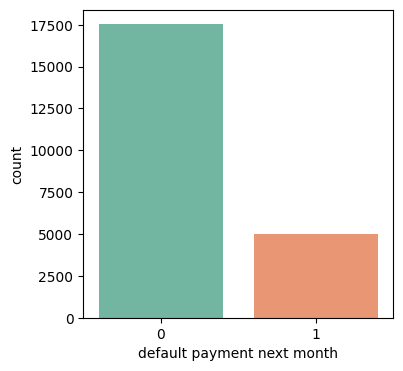

In [11]:
#train['default payment next month'].hist()
f, axes = plt.subplots(1, 1, figsize=(4, 4))
sb.countplot(data = train, x = target_column, palette = 'Set2')
train[target_column].value_counts(normalize = True)*100

1. There are no errors in data.
2. As expected, this is skewed towards not be default payment, i.e. `y = 0 (77%)`

  So, we would need to be careful in selecting the accuracy measure.

A quick look at data tells which columns are categorical, and which are numerical.

We will do separate analysis for both of categories.

In [12]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

Quick understanding of data suggests following things -
1. SEX, EDUCATION, MARRIAGE should be converted by One Hot
Encoding.
2. PAY_* features can be split in 2. If amount is fully paid that can be a) either a separate feature or b) convert it to 0. i.e. map -1 to 0. (0 makes more sense)

  What is '-2'. Its not there in description.
3. Also, since PAY_* is nominal feature, NOT converting to OneHotEncoding should be right way.
4. BILL_AMT* and LIMIT_BAL can create a feature - credit_limit_utlization.
5. BIIL_AMT* & PAY_AMT* can create feature percentage_paid i.e. how much % of bill amount is being paid.

---
# Individual Variables
Let's analyze individual variables.

## A. **People**'s **personailty/identity** related variables

### 1.1. Is any **gender** specifically more likely to default?

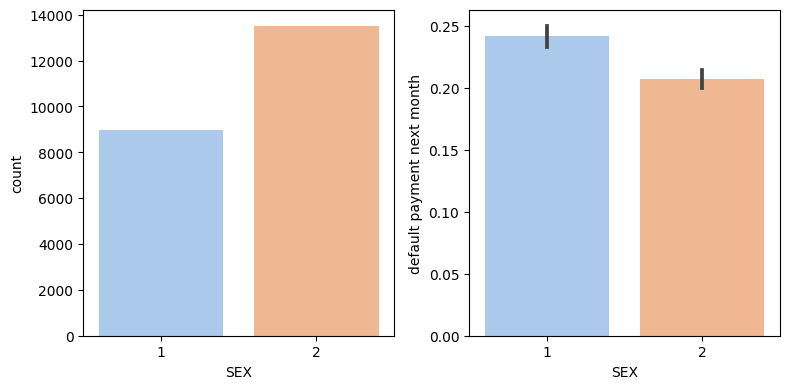

In [13]:
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2, figsize=(8, 4))
sb.countplot(train, x = "SEX", ax=axes[0], palette = 'pastel')
sb.barplot(train, x = "SEX", y = target_column, ax=axes[1], palette = 'pastel')
plt.show()

* Less number of Men but default at higher rate.

* There is a difference in default rate, but not very significant.


### 1.2. How is **education** related to defaulting on payment?

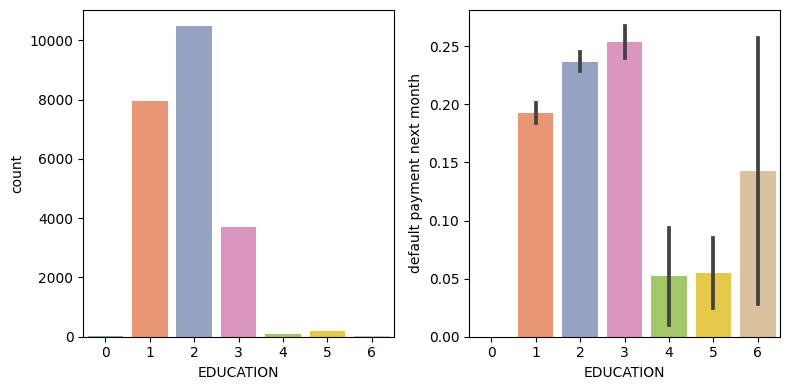

In [14]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
sb.countplot(train, x = "EDUCATION", ax=axes[0], palette = 'Set2')
sb.barplot(train, x = "EDUCATION", y = target_column, ax=axes[1], palette = 'Set2')
plt.show()

* Again. Not sure, what are 5 & 6. But default probability by these 4, 5, 6 education categories are much lower. Also, these are very low in count, so not to be worried about too much.

* Interestingly, most of the people are passed out from graduate school and university.

### 1.3. Does **marital status** show any difference in default rate?

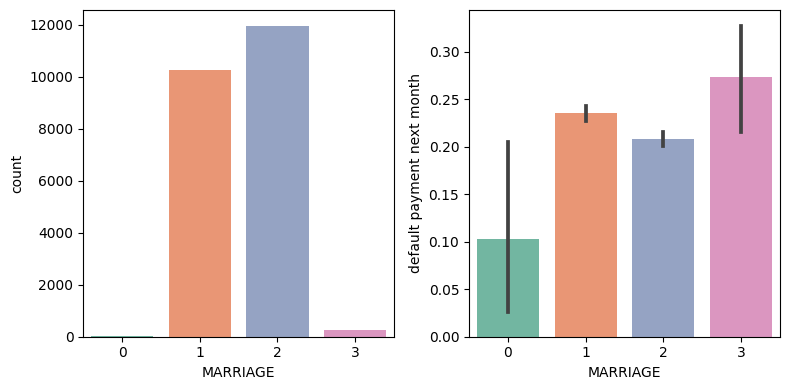

In [15]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
sb.countplot(train, x = "MARRIAGE", ax=axes[0], palette = 'Set2')
sb.barplot(train, x = "MARRIAGE", y = target_column, ax=axes[1], palette = 'Set2')
plt.show()

* Majority of people are married or single. Should not be worried specifically about category == 3 i.e. others, given that their default rate is very similar to others.

* What is 0? There is hardly any difference because of marital status. (except 0)

### 1.4. How is the **age** distribution of people and does the age have any correlation with default rate?

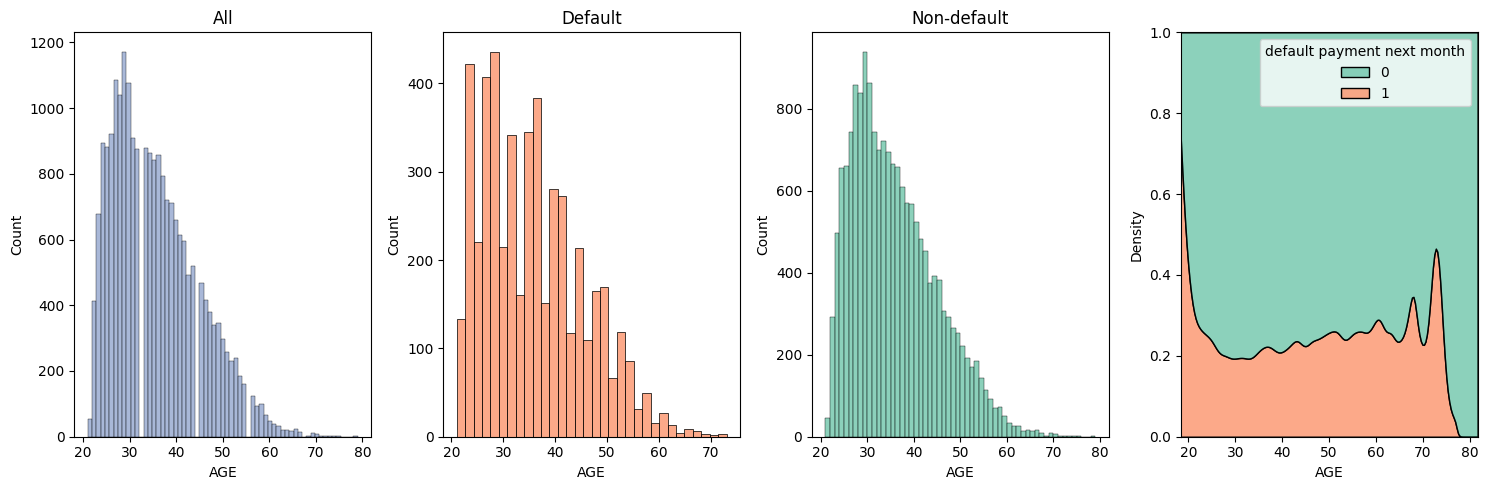

In [16]:
f, axes = plt.subplots(1, 4, figsize=(15, 5))
#print(sb.color_palette("Set2").as_hex())
sb.histplot(train, x = "AGE", ax=axes[0], color = '#8da0cb').set(title='All')
#sb.histplot(train, x = "AGE", hue = target_column, multiple = "dodge", ax=axes[1]) ### this will show both histograms in single plot
sb.histplot(train[train[target_column] == 1], x = "AGE", ax=axes[1], color = '#fc8d62').set(title='Default')
sb.histplot(train[train[target_column] == 0], x = "AGE", ax=axes[2], color = '#66c2a5').set(title='Non-default')
sb.kdeplot(train, x = "AGE", hue = target_column, multiple = "fill", bw_adjust = 0.7, ax=axes[3], palette = 'Set2')
plt.show()

* As expected, young people should be the peak of credit card users, gradually decreasing after 35. And so, positive skewed curve is expected.

* Also, curve is similar for both default and non-default. Indicating that Age might not be very good predictor in predicting default vs non-default. But not that bad also, these highest number of customers (age ~25 to ~40) have relatively low default rate also, as seen in fig 4.

* While engineeirng feature, it might be good idea to tranform this to a normal curve (by either log transform or boxcox transformation)

## B. People's **payment behavior** related variables.

Let's try to see whether previous delay in payment causes the defaulting in next month.

But there are 6 previous months which we can look at. Should we be looking at

1.   only the last month?
2.   average of last 6 months? (careful, here 9 means 9+)
3.   or just that out of last 6 months how many times payment has been delayed.

* We had seen -2 & 0 (UNKNOWNS) also for these columns, lets assume these are also positive thing, i.e. something similar to -1 which means payment was paid fully.

* Also, let's map both these values (-2 & -1) to 0.



In [17]:
pay_cols_mapping = {-2:0, -1:0}
for x in [0, 2, 3, 4, 5, 6]:
  train["PAY_" + str(x)] = train["PAY_" + str(x)].map(lambda val: pay_cols_mapping.get(val, val))

### 1.1. Only the **last month**

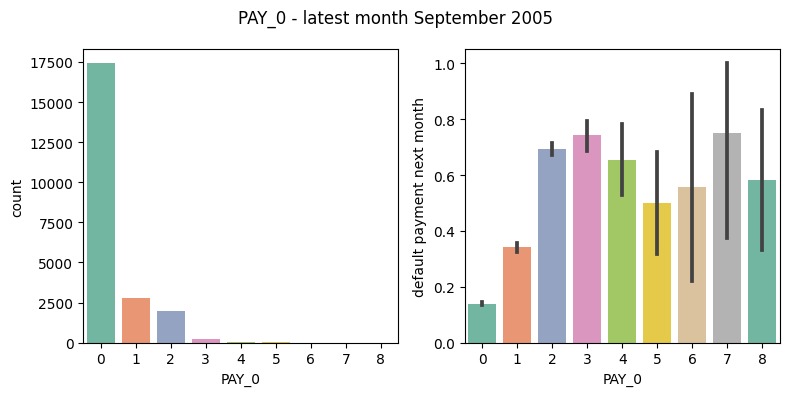

In [18]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
f.suptitle("PAY_0 - latest month September 2005")
sb.countplot(train, x = "PAY_0", ax=axes[0], palette = 'Set2')
sb.barplot(train, x = "PAY_0", y = target_column, ax=axes[1], palette = 'Set2')
plt.show()

* Late payment more than 3 are very insignificant, so the default rate might be very volatile. But still these are distinguishly very high compared to 0.

* Let's see only 0, 1, 2, 3 - if payment is done in full, it is likely that the person won't default.

* It is tempting to create a feature - "is_payment_done_fully_in_last_month", but we see there is difference in 1 & >=2 also. So maybe a feature with value 0, 1, >=2  might also be good. but lets continue with them as it is.

### 1.2. **Average** of last 6 months

In [19]:
def add_feat_PAY_AVG(df):
  df['PAY_AVG'] = 0
  for x in [0, 2, 3, 4, 5, 6]:
    df['PAY_AVG'] += df['PAY_' + str(x)]
  df['PAY_AVG'] /= 6.0

add_feat_PAY_AVG(train)

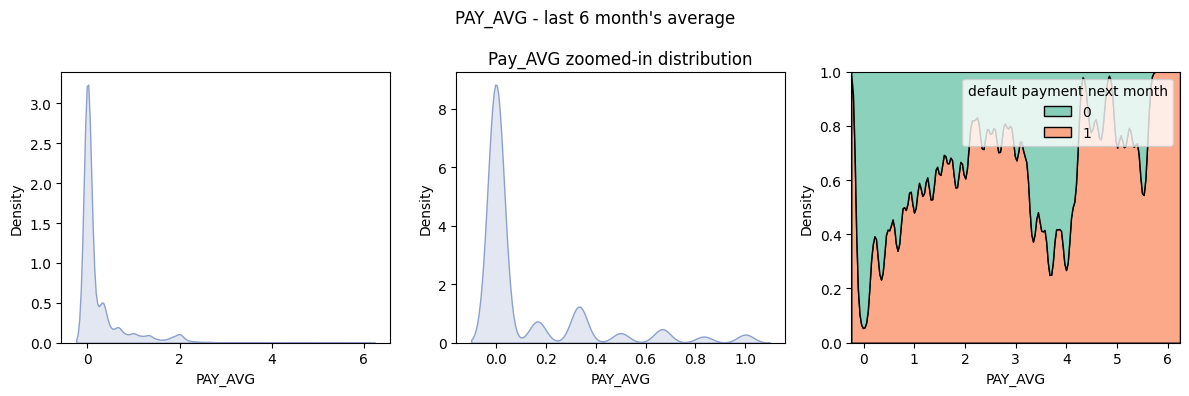

In [20]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
f.suptitle("PAY_AVG - last 6 month's average")
sb.kdeplot(train, x = "PAY_AVG", fill = True, ax=axes[0], color = '#8da0cb')
sb.kdeplot(train[train["PAY_AVG"] <= 1], x = "PAY_AVG", fill = True, ax=axes[1], color = '#8da0cb').set(title='Pay_AVG zoomed-in distribution')
sb.kdeplot(train, x = "PAY_AVG", hue = target_column, multiple = "fill", ax=axes[2], palette = 'Set2')
plt.show()

* Similar behavior as just with one last month - small anomaly around 4 & 6 month delay, otherwise, higher the payment delay, higher the chance of defaulting.

* Overall its a good indicator for our target column.

### 1.3. Number of **No delayed payments** in last 6 months

**Hypethesis** - If someone is not delaying the payment (as seen from past payment behaviors), likely wont default in future.

In [21]:
def add_feat_NO_DELAY_6_MONTHS(df):
  df['NO_DELAY_6_MONTHS'] = 0
  for x in [0, 2, 3, 4, 5, 6]:
    df['NO_DELAY_6_MONTHS'] += df["PAY_" + str(x)] == 0

add_feat_NO_DELAY_6_MONTHS(train)

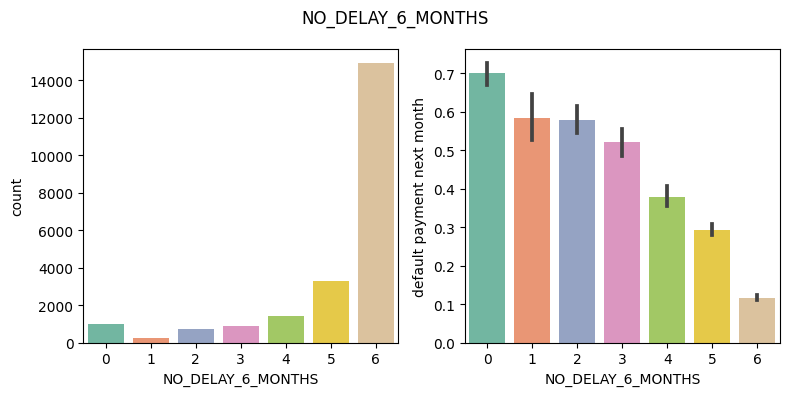

In [22]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
f.suptitle("NO_DELAY_6_MONTHS")
sb.countplot(train, x = "NO_DELAY_6_MONTHS", palette = 'Set2', ax=axes[0])
sb.barplot(train, x = "NO_DELAY_6_MONTHS", y = target_column, palette = 'Set2', ax=axes[1])
plt.show()

* This, clearly, seems highly coorelated with Default. Higher the number of No delayed payments, lower the chances of Defaulting.

* We would check features x features correlation matrix also later. But just for this feature, let's check `corr()` right away.

In [23]:
train['NO_DELAY_6_MONTHS'].corr(train[target_column])

-0.399434909057659

Expected!!!

## C. Billing patterns

So there is some credit limit, bill amount and payment amounts for last 6 months.

Intituitively, unlikely these values individually will be correlating with default. We will see the patterns anyway and then will try to see some intuitive combination of these features.

### 1.1. Visualize LIMIT_BAL

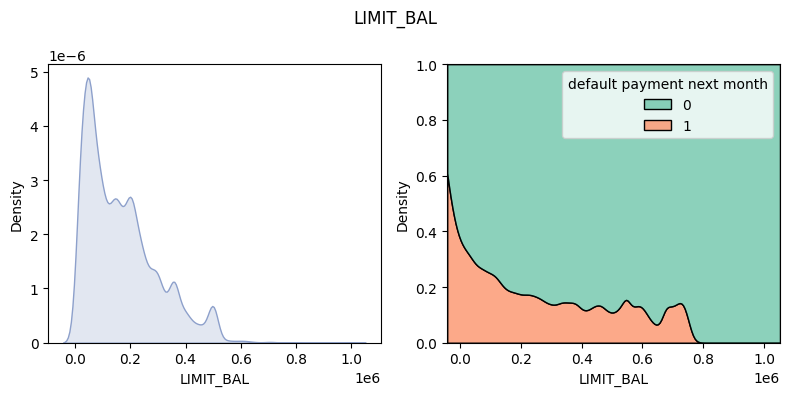

In [24]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
f.suptitle("LIMIT_BAL")
p1 = sb.kdeplot(train, x = "LIMIT_BAL", fill = True, ax=axes[0], color = '#8da0cb')
#p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
p2 = sb.kdeplot(train, x = "LIMIT_BAL", hue = target_column, multiple = "fill", ax=axes[1], palette = "Set2")
plt.show()

* This is interesting and intuitively surprising - Higher the given credit (LIMIT_BAL), less chance of default.

* I was thinking if people have higher limit, they would have been spending more and creating higher chance of default. But probably, higher limit people are more responsible with their money also.

* Also, this is positively skewed. We should transform this to normal before modeling.

### 1.2. Visualize Credit_Limit_Utilization

Ratio of latest month's bill amount to LIMIT_BAL might not be accurate way to tell credit_limit_utilization, as there might be pervious outstanding too.

But let's just try to see this variable only - behavior of current month to LIMIT_BAL ratio.

In [25]:
def add_feat_Credit_Limit_Utilization(df):
  df['Credit_Limit_Utilization'] = df["BILL_AMT1"] / df["LIMIT_BAL"] * 100

add_feat_Credit_Limit_Utilization(train)

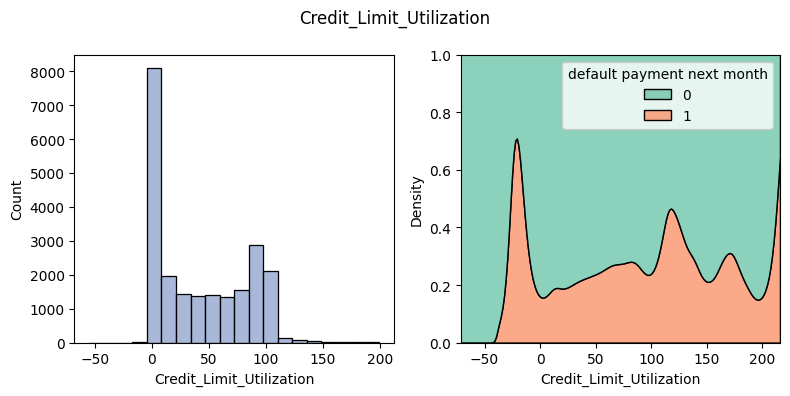

In [26]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
f.suptitle("Credit_Limit_Utilization")
sb.histplot(train[train['Credit_Limit_Utilization'] < 200], x = "Credit_Limit_Utilization", bins = 20, ax=axes[0], color = '#8da0cb')
sb.kdeplot(train[train['Credit_Limit_Utilization'] < 200], x = "Credit_Limit_Utilization", hue = target_column, multiple = "fill", ax=axes[1], palette = "Set2")
plt.show()

* We already knew that this is not accurate measure of Credit limit utilization This looks quite unrelated to default.

### 1.3. Total Billed Amount in last 6 months

Let's find out how much is the ratio of 1. total billed_amount in last 6 months and 2. Credit Limit

In [27]:
def add_feat_UTILIZE_6_MONTHS(df):
  df['UTILIZE_6_MONTHS'] = 0
  for x in range(1, 7):
    df['UTILIZE_6_MONTHS'] = df["BILL_AMT" + str(x)]
  df['UTILIZE_6_MONTHS'] /= df['LIMIT_BAL'] * 100

add_feat_UTILIZE_6_MONTHS(train)

<ipython-input-28-ceb59e15bcbe>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p2.set_xticklabels(p2.get_xticklabels(), rotation=90)


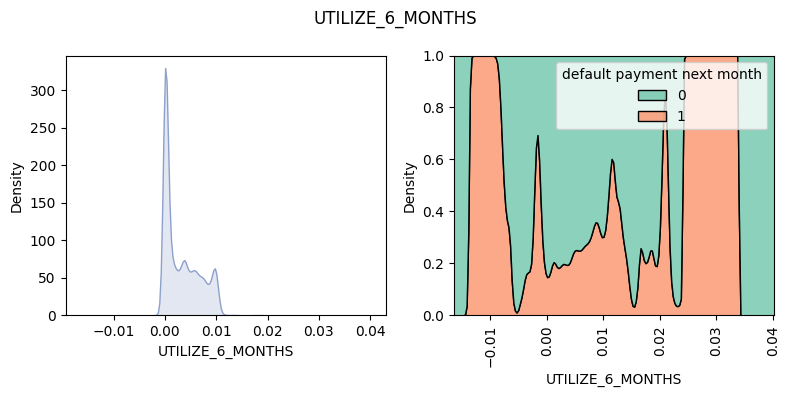

In [28]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
f.suptitle("UTILIZE_6_MONTHS")
p1 = sb.kdeplot(train, x = "UTILIZE_6_MONTHS", ax=axes[0], color = '#8da0cb', fill = True)
#p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
p2 = sb.kdeplot(train, x = "UTILIZE_6_MONTHS", hue = target_column, multiple = "fill", ax=axes[1], palette = 'Set2')
p2.set_xticklabels(p2.get_xticklabels(), rotation=90)
plt.show()

This, also, seems very noisy and not correlated at all.

### 1.4. Bill Amount Volatility

**Concerns/Questions** - Do people spend unexpectedly high? and forget and/or unable to pay?
People who just use credit cards regularly and according to their spending habits, will try not to default and should be more sensible with their money.

**This feature would have made more sense if we had more historical bill amounts, 6 is too less.**

Let's find out.

In [29]:
def add_feat_BILL_AMT_VOLATILITY(df):
  df['BILL_AMT_VOLATILITY'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].std(axis = 1)

add_feat_BILL_AMT_VOLATILITY(train)

<ipython-input-30-5e4e59b71423>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
<ipython-input-30-5e4e59b71423>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p2.set_xticklabels(p2.get_xticklabels(), rotation=90)
<ipython-input-30-5e4e59b71423>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=90)
<ipython-input-30-5e4e59b71423>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  p4.set_xticklabels(p4.get_xticklabels(), rotation=90)
<ipython-input-30-5e4e59b71423>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p5.set_xticklabels(p5.get_xticklabels(), rotation=90)
<ipython-input-30-5e4e59b71423>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  p6.set_xticklabels(p6.get_xticklabels(), rotation=90)
<

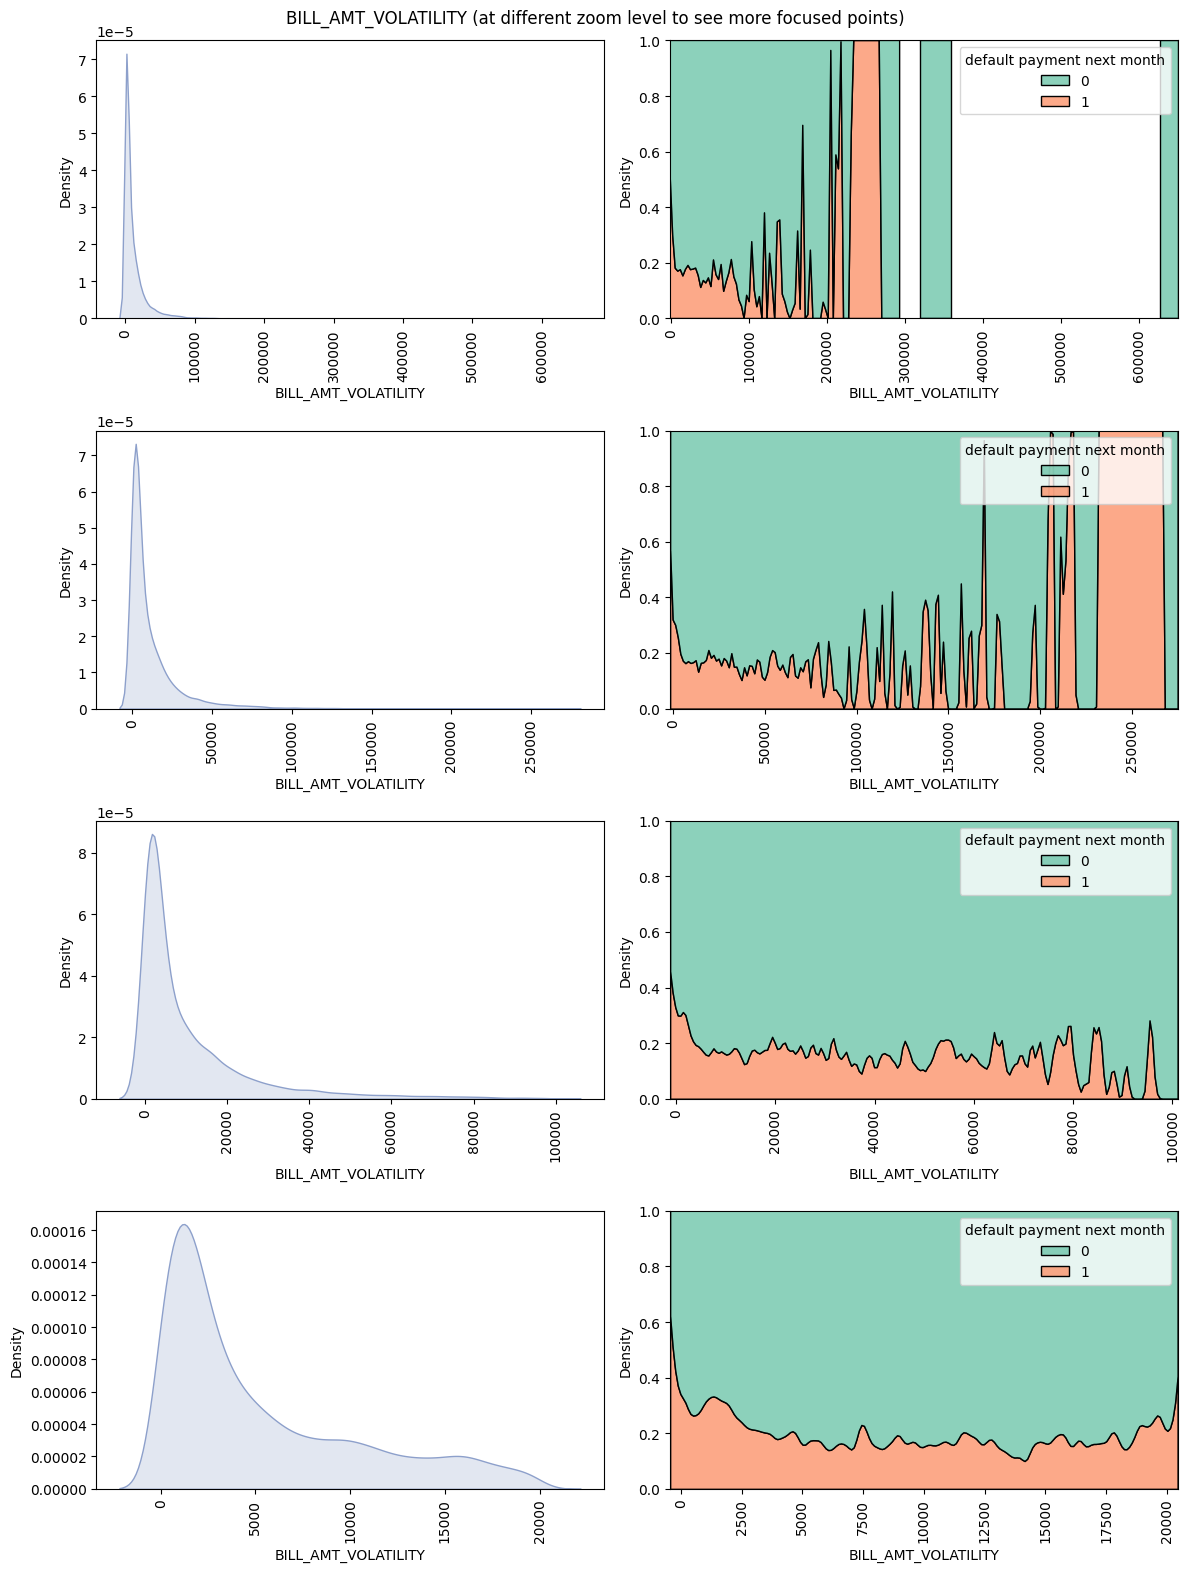

In [30]:
f, axes = plt.subplots(4, 2, figsize=(12, 16))
f.suptitle("BILL_AMT_VOLATILITY (at different zoom level to see more focused points)")
p1 = sb.kdeplot(train, x = "BILL_AMT_VOLATILITY", ax=axes[0][0], color = '#8da0cb', fill = True)
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
p2 = sb.kdeplot(train, x = "BILL_AMT_VOLATILITY", hue = target_column, multiple = "fill", bw_adjust = 0.2, ax=axes[0][1], palette = 'Set2')
p2.set_xticklabels(p2.get_xticklabels(), rotation=90)

p3 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 300000], x = "BILL_AMT_VOLATILITY", ax=axes[1][0], color = '#8da0cb', fill = True)
p3.set_xticklabels(p3.get_xticklabels(), rotation=90)
p4 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 300000], x = "BILL_AMT_VOLATILITY", hue = target_column, multiple = "fill", bw_adjust = 0.2, ax=axes[1][1], palette = 'Set2')
p4.set_xticklabels(p4.get_xticklabels(), rotation=90)

p5 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 100000], x = "BILL_AMT_VOLATILITY", ax=axes[2][0], color = '#8da0cb', fill = True)
p5.set_xticklabels(p5.get_xticklabels(), rotation=90)
p6 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 100000], x = "BILL_AMT_VOLATILITY", hue = target_column, multiple = "fill", bw_adjust = 0.2, ax=axes[2][1], palette = 'Set2')
p6.set_xticklabels(p6.get_xticklabels(), rotation=90)

p7 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 20000], x = "BILL_AMT_VOLATILITY", ax=axes[3][0], color = '#8da0cb', fill = True)
p7.set_xticklabels(p7.get_xticklabels(), rotation=90)
p8 = sb.kdeplot(train[train['BILL_AMT_VOLATILITY'] < 20000], x = "BILL_AMT_VOLATILITY", hue = target_column, multiple = "fill", bw_adjust = 0.2, ax=axes[3][1], palette = 'Set2')
p8.set_xticklabels(p8.get_xticklabels(), rotation=90)

plt.show()

In [31]:
train['BILL_AMT_VOLATILITY'].describe()

count     22500.000000
mean      12081.254023
std       20379.570064
min           0.000000
25%        1550.170768
50%        4593.655452
75%       14403.099309
max      647788.051081
Name: BILL_AMT_VOLATILITY, dtype: float64

**Observations** -

* Majority of people have very less volatility (20,000) in their bill amount. ANd in this range, it decreases as volatility increases.

* But after that, it is relatively higher but highly fluctuating.

---
# Correlation between the variables

## 1.1. Let's analyze correlation between these promising features and target_column

<Axes: >

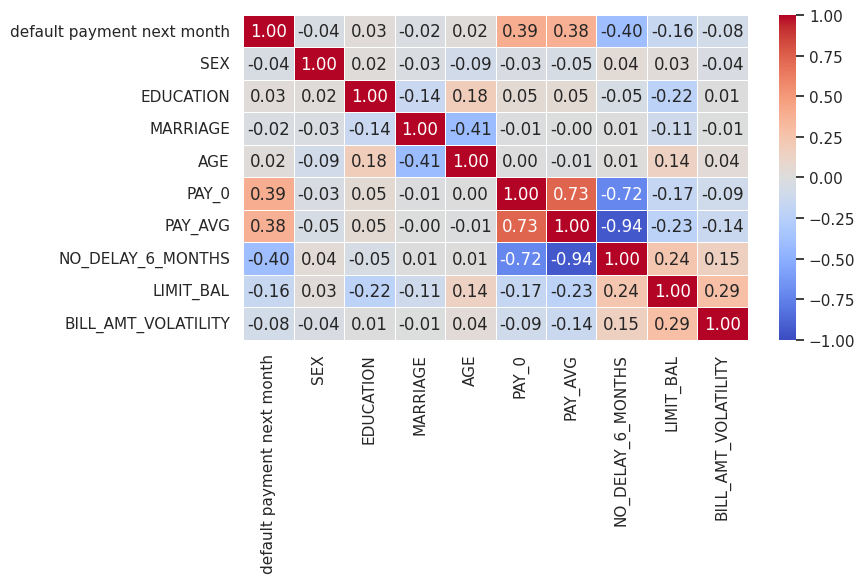

In [32]:
sb.set(rc={'figure.figsize':(9,6)})
sb.heatmap(
    train[[target_column, 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_AVG', 'NO_DELAY_6_MONTHS', 'LIMIT_BAL', 'BILL_AMT_VOLATILITY']
        ].corr(), annot = True, linewidth = .5, fmt=".2f", vmin = -1, vmax = 1, cmap = "coolwarm")

#### **Observations** --
1. PAY_0 and PAY_AVG came out to be correlated with each other.
2. NO_DELAY_6_MONTHS is also negatively correlated with above 2 variables, which is expected also.
  * If we end up using tree based classification models, we do not need to worry much, but logistic regression would be problematic because linear equation (w*x + b) does not work very well with collinear features.
3.  Other than above variables, only LIMIT_BAL has somewhat negative correlation with target_column. No other variable, indivisually, seems to have correlation with target_column.





## 1.2. Let's see corr heatmap of other remaining variables as well.

<Axes: >

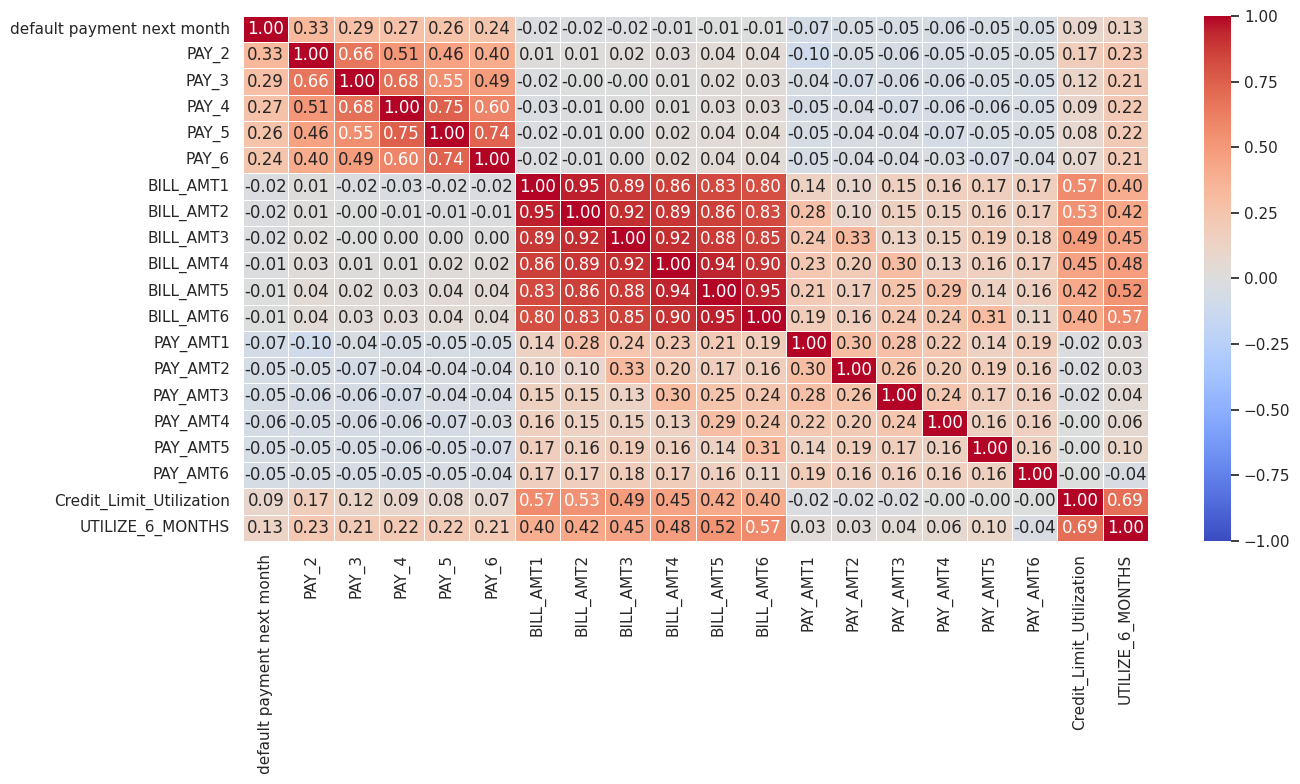

In [33]:
sb.set(rc={'figure.figsize':(14,8)})
sb.heatmap(
    train[[target_column, 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Credit_Limit_Utilization', 'UTILIZE_6_MONTHS']
        ].corr(), annot = True, linewidth = .5, fmt=".2f", vmin = -1, vmax = 1, cmap = 'coolwarm')

#### **Observations** --
1. target_column is correlated with PAY_* columns, which we captured in previous heatmap also. PAY_AVG is capturing all of PAY_[0,2,3,4,5,6], but we can include all of them individually also.
2. BILL_AMT_* are highly correlated with each other. We saw this previously also, that volatility is very less and majority of the entries have very low volatility.
3. It was not clear from previous analysis if Credit_Limit_Utilization and UTILIZE_6_Months were important or not, but seems they have slightly positive correlation with target_column.

## 1.3. Other feature relations
These explorations might be unrelated to the target column.

### 1.3.1 Age vs LIMIT_BAL

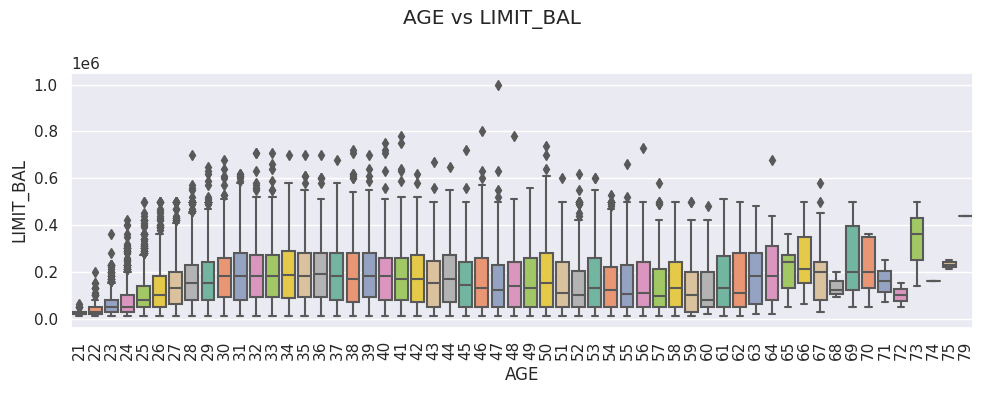

In [34]:
f, axes = plt.subplots(1, 1, figsize=(10, 4))
f.suptitle("AGE vs LIMIT_BAL")
p1 = sb.boxplot(train, x = "AGE", y = 'LIMIT_BAL', palette = 'Set2')
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
plt.show()

* Interesting to see that mid 50% range maximizes at age of 30-31 and remains the same till age of 60.

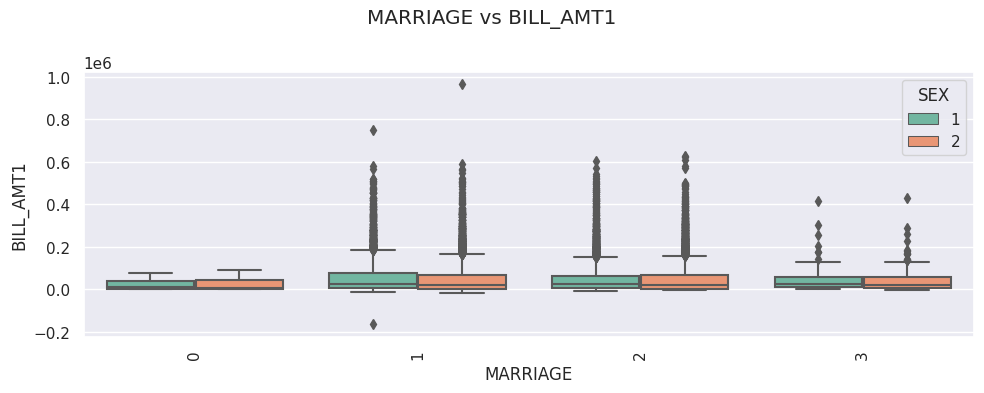

In [35]:
f, axes = plt.subplots(1, 1, figsize=(10, 4))
f.suptitle("MARRIAGE vs BILL_AMT1")
p1 = sb.boxplot(train, x = "MARRIAGE", y = 'BILL_AMT1', palette = 'Set2', hue="SEX")
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
plt.show()

# Data Cleaning & Feature Engineering

## 1.1. Are there missing values?

In [36]:
train.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
PAY_AVG                       0
NO_DELAY_6_MONTHS             0
Credit_Limit_Utilization      0
UTILIZE_6_MONTHS              0
BILL_AMT_VOLATILITY           0
dtype: int64

One less thing to worry about. 😀

## 1.2. Outliers detection and removal
* Skipping this part for now for time constraints.

* Known techniques to do this analysis - 1. Local Outlier Factor and 2. Isolation Forest.

## 1.3. Detecting multi-collinearity
* Again, skipping this part for now.

* corr() - correlation matrix find correlation between 2 variables only but cant not find correlation between more than 2 variables.

* Variance Inflation Factor (VIF) is the technique to find & drop "not so useful" features from set of selected features one by one.

## 1.4. Pipeline for feature engineering

In [37]:
from sklearn import set_config
pipeline = Pipeline([
  (
    "FeatureEngineering",
    ColumnTransformer(
        [
          ("OHE", OneHotEncoder(handle_unknown='ignore'), ["SEX", "EDUCATION", "MARRIAGE"]),
          ("Normalize", StandardScaler(), ["AGE", "LIMIT_BAL", "BILL_AMT_VOLATILITY", "Credit_Limit_Utilization", "UTILIZE_6_MONTHS", 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
          ("LogTransform", FunctionTransformer(lambda value: np.log1p(value)), ["LIMIT_BAL", "BILL_AMT_VOLATILITY"])
        ]
    )
  )
])



## 1.5. Final steps to prepare data

In [38]:
# work only on this data_copy only. Do not modify data.
data_copy = data.copy()

# add engineered features
add_feat_PAY_AVG(data_copy)
add_feat_NO_DELAY_6_MONTHS(data_copy)
add_feat_Credit_Limit_Utilization(data_copy)
add_feat_UTILIZE_6_MONTHS(data_copy)
add_feat_BILL_AMT_VOLATILITY(data_copy)

# First split - will spit out 15% test
train_val, test = train_test_split(data_copy, shuffle = True, stratify = data_copy[target_column], test_size = 0.15, random_state = 2023)
# Second split - will spit out 15% validation
# 0.85 * 0.17647 = 0.15
train, val = train_test_split(train_val, shuffle = True, stratify = train_val[target_column], test_size = 0.17647, random_state = 2023)

## 15% test
## 85% train and validation
    ## 17.64% of 85% becomes..
    ### 15% validation
    ### 70% train
### final split
### train = 70, validation = 15, test = 15

# split x & y
train_x = train.drop(target_column, axis = 1)
train_y = train[target_column]
val_x = val.drop(target_column, axis = 1)
val_y = val[target_column]
test_x = test.drop(target_column, axis = 1)
test_y = test[target_column]

# check shapes
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_x.shape)
print(test_y.shape)


# run feature engg transform pipeline
train_x = pipeline.fit_transform(train_x)
val_x = pipeline.transform(val_x)
test_x = pipeline.transform(test_x)

# check shapes again
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_x.shape)
print(test_y.shape)

(21000, 28)
(21000,)
(4500, 28)
(4500,)
(4500, 28)
(4500,)
(21000, 32)
(21000,)
(4500, 32)
(4500,)
(4500, 32)
(4500,)


In [39]:
train_x[0:5]

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -1.35449242e+00, -9.03544206e-01,
        -3.42104179e-01, -3.45246074e-01, -9.06612469e-01,
        -5.05681292e-01, -6.11917639e-01, -5.89634562e-01,
        -5.22077642e-01, -6.39931582e-01, -6.51988403e-01,
         1.46218125e-02, -1.59776316e-01, -9.67727962e-03,
        -2.26277847e-01, -2.83622116e-01, -2.91166730e-01,
         1.08197983e+01,  8.53572518e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.78369140e-01,  2.25300166e+00,
        -5.03131096e-01, -1.01005768e+00, -9.18407222e-01,
        -6.30

# Modelling

## Model options
What are the choices? There are few classification techniques --
1.   **Logistic Regression** - Good starting point, but wont be good enough if data is not linearly separable.
2.   **SVC** - could work well, with kernels for non-linearity. Also, data is also not much, so training will be fast, but SVC wont give us probabilities of outcomes, but just the predicted class.
3. **Decision Trees & Forests** & Variations - Trees are robust for various kind of data, even for non-linear data. Easy to tune bias and variance by inttroducing different variations, like Bagging, Boosting, Random Forest. Intuitive and less number of hyper parameters to be tuned.
4. **Simple Neural Network** - A large NN wont make sense here, as data sample size is very less, but 2 layer NN can turn out to be beneficial. Will introduce non-linearity and enough complexity.

## Goal / Metrics


*   A trade off between Precision and Recall (for default)

      * If business demands to catch default with high recall, focus on that, but if business does not want to false detect the defaults, then we can focus on precision.

      * Using accuracy dilutes this class imbalance, so we should not be using accuracy as goal, but just for soft guidance of model behavior.
*   F1 score
*   ROC-AUC



## Explore Models

### 1.1. Logistic Regression

**Quick intro about model** - A linear model represented by linear equation and sigmoid function on top of that.
```
z = w.x + b
y = sigmoid(z)
```

This is the default starting point of trying logistic regression.

If looks promising, try tuning hyperparameters.

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression(max_iter = 5000, random_state = 2023)
log_reg_1.fit(train_x, train_y)

LogisticRegression(max_iter=5000, random_state=2023)

In [41]:
train_predictions = log_reg_1.predict(train_x)
predictions = log_reg_1.predict(val_x)

In [42]:
from sklearn.metrics import f1_score, accuracy_score
print("f1_score : ")
print(f1_score(train_y, train_predictions))
print(f1_score(val_y, predictions))
print("accuracy_score : ")
print(accuracy_score(train_y, train_predictions))
print(accuracy_score(val_y, predictions))

f1_score : 
0.05328452308318081
0.05118483412322274
accuracy_score : 
0.7783333333333333
0.7775555555555556


* Its a very bad start, F1-score is almost 0. But good news, that model itself is not learning train samples. F1_score of train samples is also very close to 0.

* First intuition, we had features which were collinear. Presence of collinear feature would create problems with linear and logisitic regression models and would learn unstable and non-optimized weights.

* By default above model is using `l2 norm`, if we use `l1 norm` (and `elasticnet` to use both norms), we can get rid of few of the collinear features.

Let's try that.

#### 1.1.1. Logistic Regression with L1 norm

L1 norm will allow to reduce weights corresponding to few varable to zero.

So that it works as feature selection also.

In [43]:
# default solver lbfgs does not support l1 norm, so we use the next best fast solver for small datasets - liblinear
log_reg_2 = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 5000, random_state = 2023)
log_reg_2.fit(train_x, train_y)

LogisticRegression(max_iter=5000, penalty='l1', random_state=2023,
                   solver='liblinear')

In [44]:
train_predictions = log_reg_2.predict(train_x)
predictions = log_reg_2.predict(val_x)

In [45]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print("f1_score : ")
print(f1_score(train_y, train_predictions))
print(f1_score(val_y, predictions))
print("accuracy_score : ")
print(accuracy_score(train_y, train_predictions))
print(accuracy_score(val_y, predictions))
print("precision : ")
print(precision_score(train_y, train_predictions))
print(precision_score(val_y, predictions))
print("recall : ")
print(recall_score(train_y, train_predictions))
print(recall_score(val_y, predictions))

f1_score : 
0.049407921600653326
0.045670789724072305
accuracy_score : 
0.7782857142857142
0.7771111111111111
precision : 
0.4801587301587302
0.42857142857142855
recall : 
0.026043908738699956
0.024120603015075376


Same result.
Let's plot to ROC-AUC curve also.

AUC Score : 


0.60503728944323

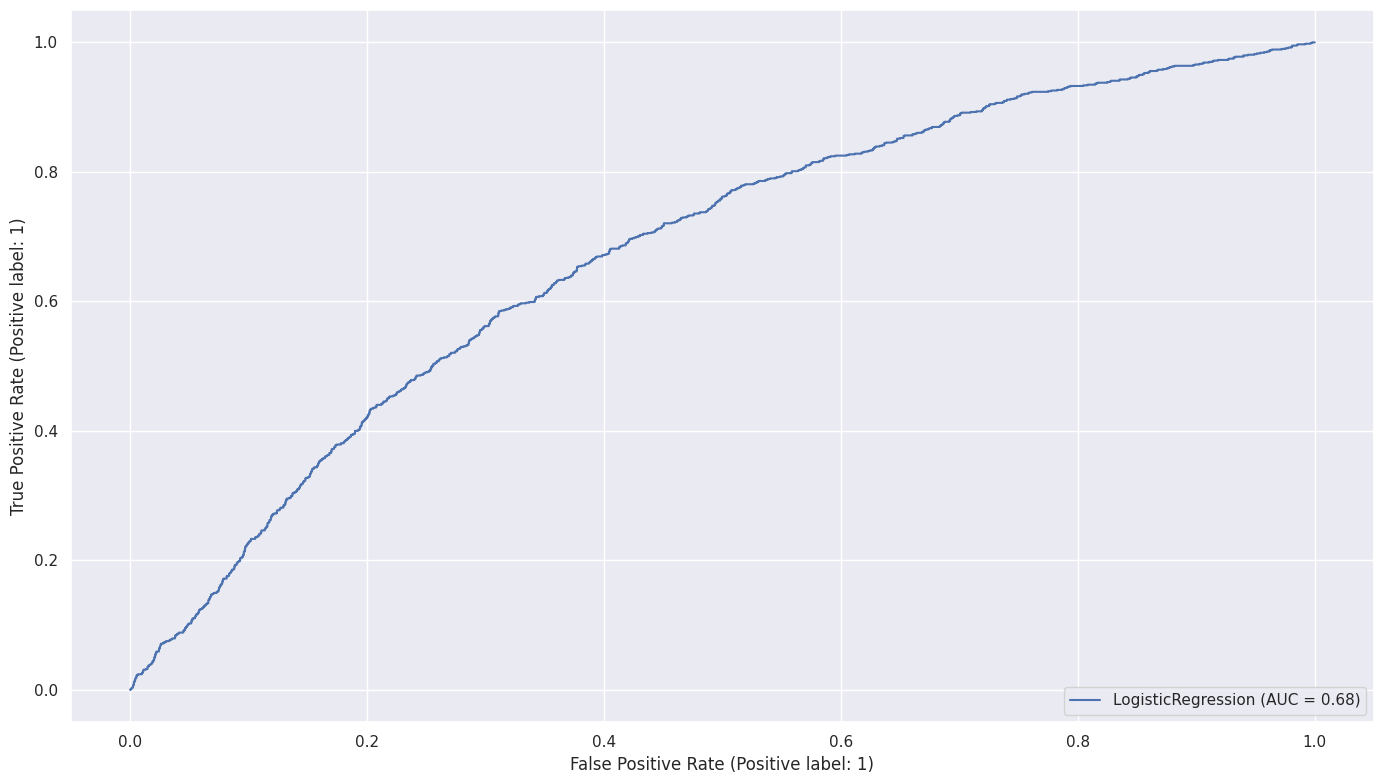

In [46]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(log_reg_2, val_x, val_y)
print("AUC Score : ")
roc_auc_score(predictions, val_y)

#### 1.1.2. Logistic Regression with L1 & L2 Norms (ElasticNet)

* Let's try to add `l2 norm` as well, so that model does not overfit, but we dont have any evidence yet for overfitting yet.

* Let's first try to re-train the previous model as deep as we can with just `l1 norm` (maybe by tuning some hyperparameters as well). If it overfits, we can add `l2 norm`.

* What are we changing in this iteration -
  1.   max_iter --> 5k to 100k
  2.   class_weight --> Nonde to balanced (to handle class imbalance in our target column)


In [47]:
log_reg_2 = LogisticRegression(solver = 'liblinear', penalty = 'l1', class_weight = 'balanced', max_iter = 100000, random_state = 2023)
log_reg_2.fit(train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=100000, penalty='l1',
                   random_state=2023, solver='liblinear')

In [48]:
train_predictions = log_reg_2.predict(train_x)
predictions = log_reg_2.predict(val_x)

In [49]:
# encapsulating everything we want to see after model training in this single function
def model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, model):
  print("f1_score : ")
  print("{:.4f}".format(f1_score(train_y, train_predictions)))
  print("{:.4f}".format(f1_score(val_y, predictions)))
  print("accuracy_score : ")
  print("{:.4f}".format(accuracy_score(train_y, train_predictions)))
  print("{:.4f}".format(accuracy_score(val_y, predictions)))

  print("precision : ")
  print("{:.4f}".format(precision_score(train_y, train_predictions)))
  print("{:.4f}".format(precision_score(val_y, predictions)))
  print("recall : ")
  print("{:.4f}".format(recall_score(train_y, train_predictions)))
  print("{:.4f}".format(recall_score(val_y, predictions)))

  RocCurveDisplay.from_estimator(model, val_x, val_y)
  print("AUC Score : ")
  print("{:.4f}".format(roc_auc_score(predictions, val_y)))

f1_score : 
0.4365
0.4347
accuracy_score : 
0.6255
0.6260
precision : 
0.3272
0.3264
recall : 
0.6556
0.6503
AUC Score : 
0.5941


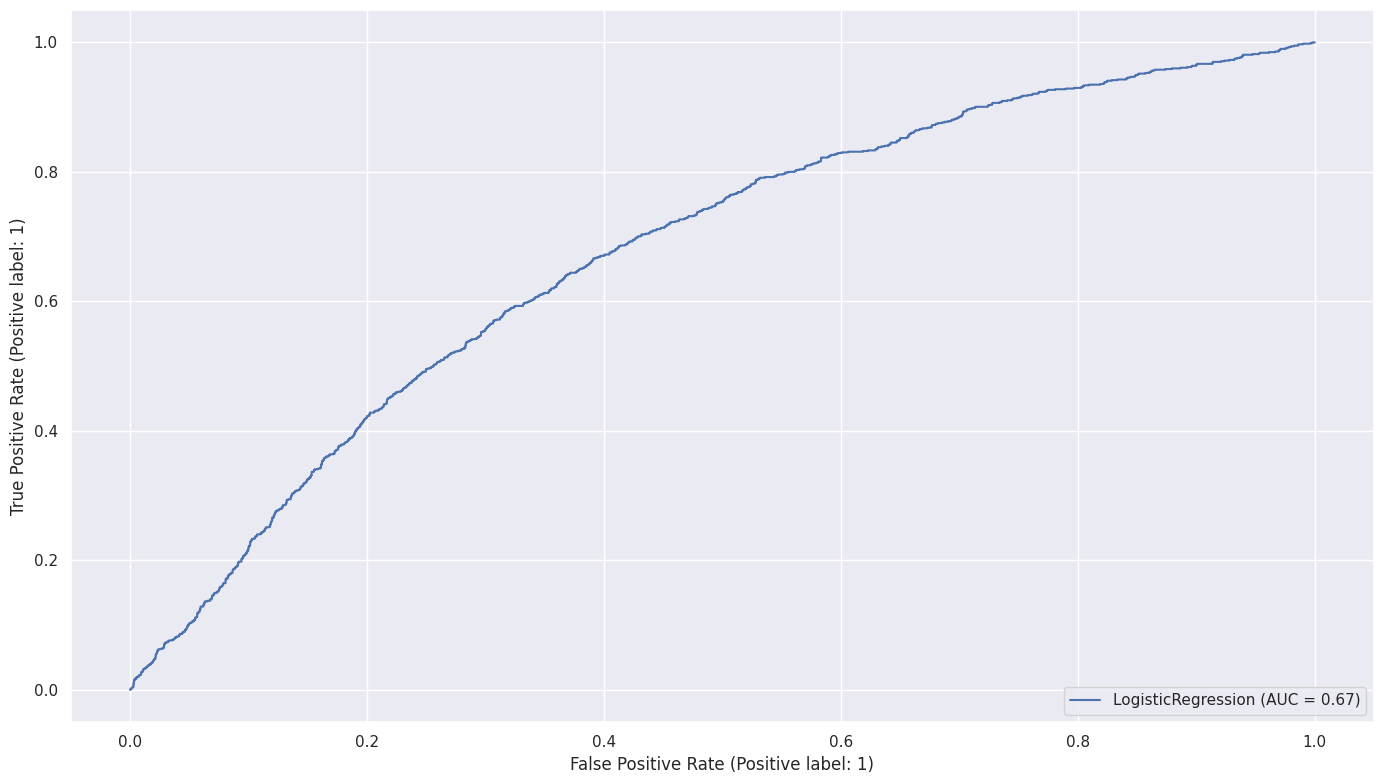

In [50]:
model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, log_reg_2)

* Nice, we improved f1_score from 0.05 to 0.43

* Observed that, this improvement is coming from class_weight parameter change, and not by increasing number of iterations.

* So far, we do not have any evidence of model overfitting, so no point of using `l2 norm / elasticnet`. We can now explore other models.

### 1.2. Decision Tree & Variations

Let's start with vanilla decision tree and change path according to the outcome.

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(random_state = 2023)
tree_1.fit(train_x, train_y)

DecisionTreeClassifier(random_state=2023)

In [52]:
train_predictions = tree_1.predict(train_x)
predictions = tree_1.predict(val_x)

f1_score : 
0.9978
0.3402
accuracy_score : 
0.9990
0.6958
precision : 
0.9998
0.3269
recall : 
0.9959
0.3548
AUC Score : 
0.5696


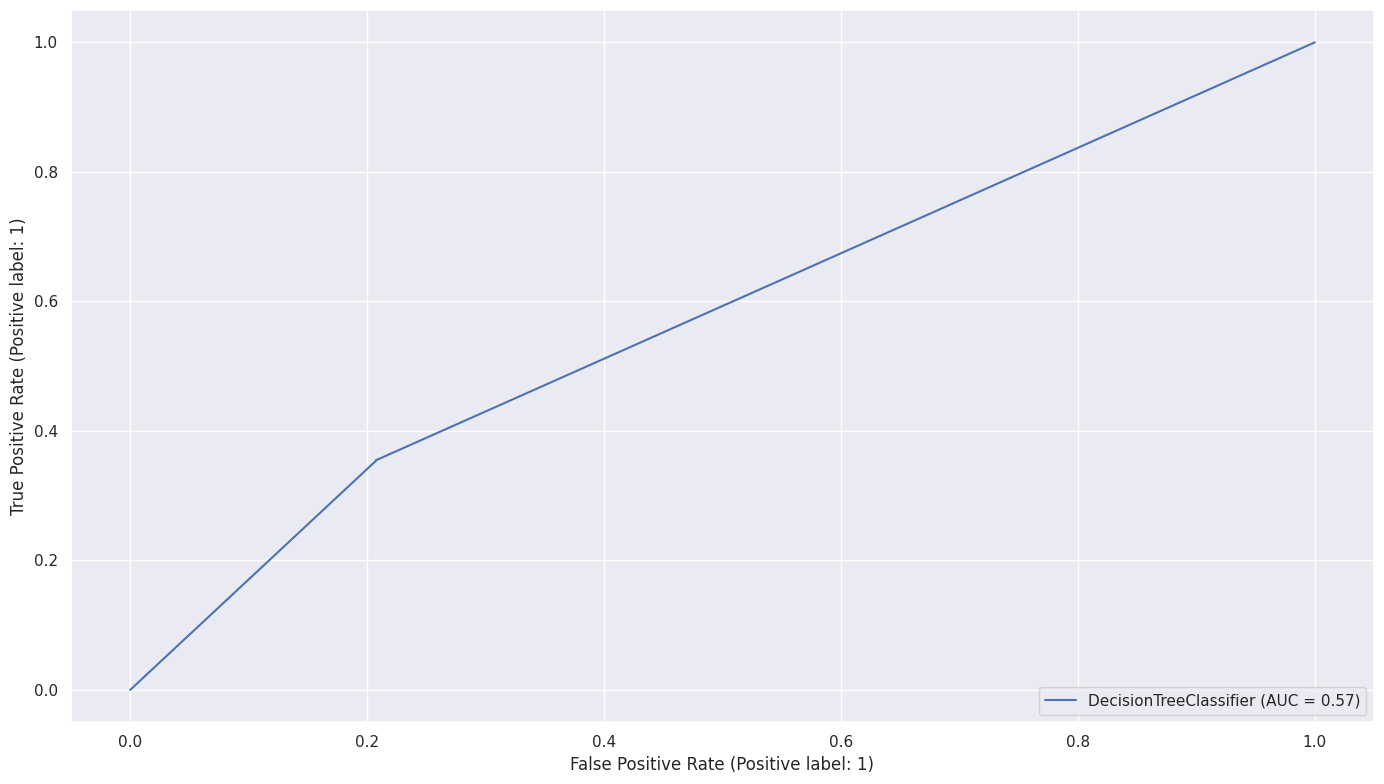

In [53]:
model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, tree_1)

* So, just this simple model is doing much much better than LogisticRegression, but only on train data.

* It tells, model has capability to learn but overfitting and not generalizing to the unseen data.

* What options do we have now?

  *   try cross validation
  *   try Random forest to increase bias and reduce variance in model
  *   try searching best hyperparameters by GridSearchCV to avoid individual trees to avoid overfitting.



#### 1.2.1 Decision Tree CV

In [54]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(tree_1, train_x, train_y, cv=10)

In [55]:
f1_score(train_y, preds)

0.340310319691763

Cross validation also does not improve unseen data's f1_score.

We need to make model robust and generalize well.

#### 1.2.2. Random Forest Classifier (and Extra Trees)

Random forest will use bagging (specifically pasting) to use subset of samples and subset of features in each estimator (tree). These things should help reducing variance.

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest_1 = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 2023)
forest_1.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', random_state=2023)

In [57]:
train_predictions = tree_1.predict(train_x)
predictions = tree_1.predict(val_x)

f1_score : 
0.9978
0.3402
accuracy_score : 
0.9990
0.6958
precision : 
0.9998
0.3269
recall : 
0.9959
0.3548
AUC Score : 
0.5696


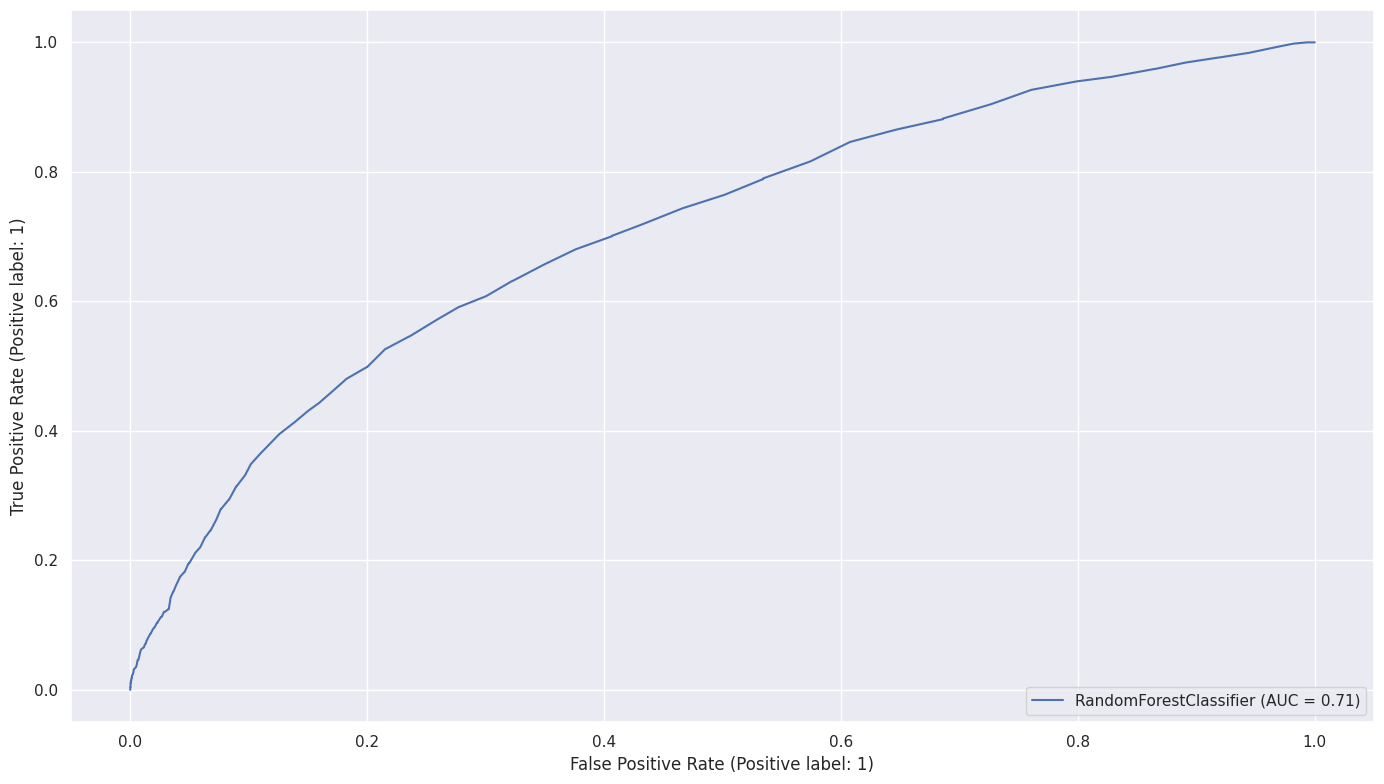

In [58]:
model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, forest_1)

This is very similar to single decision tree.

Next, we will try to find suitable hyperparameters by GridSearchCV or RandomizedSearchCV.



#### 1.2.3. RandomrForest with Hyperparameters search

What hyperparameters are worth exploring?
*   max_depth         : default = None, try = 5 to 10k
*   min_samples_split : default = 2, try = 2 to 20
*   min_samples_leaf  : default = 1, try = 1 to 20
*   max_features can be changed?
*   max_leaf_nodes    : default = None/Unlimited, try = 500 to 50k
*   min_impurity_decrease : default = 0.0, try = 0 to 0.1

**Warning : Next cell will take around 20 minutes. Please refer saved results after this Code cell.**

In [59]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth'         : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
          'min_samples_split' : [2, 5, 10, 15, 20],
          'min_samples_leaf'  : [1, 2, 4, 10, 12, 15, 20],
          'max_features'      : [0.5, 'sqrt', 'log2'],
          'max_leaf_nodes'    : [500, 1000, 2000, 5000, 10000, 20000],
          'min_impurity_decrease' : [0, 0.01, 0.02, 0.05, 0.1],
          'n_estimators'      : [25, 50, 80, 100, 120, 150, 200]
          }

forest_2 = RandomForestClassifier(class_weight = 'balanced', random_state = 2023)
forest_randomized_cv = RandomizedSearchCV(forest_2, params, scoring = 'f1', n_iter = 100, n_jobs = 4, cv = 5, verbose = 4)

forest_randomized_cv.fit(train_x, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=2023),
                   n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': [0.5, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [500, 1000, 2000,
                                                           5000, 10000, 20000],
                                        'min_impurity_decrease': [0, 0.01, 0.02,
                                                                  0.05, 0.1],
                                        'min_samples_leaf': [1, 2, 4, 10, 12,
                                                             15, 20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [25, 50, 80, 100, 120,
                                                         150, 200]},
                   scoring='f1', verbose=4)

In [60]:
forest_randomized_cv.best_params_
forest_randomized_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=40, max_features=0.5,
                       max_leaf_nodes=500, min_impurity_decrease=0,
                       min_samples_leaf=20, min_samples_split=15,
                       n_estimators=120, random_state=2023)

In [61]:
train_predictions = forest_randomized_cv.predict(train_x)
predictions = forest_randomized_cv.predict(val_x)

f1_score : 
0.6663
0.4650
accuracy_score : 
0.8299
0.7387
precision : 
0.5885
0.4248
recall : 
0.7678
0.5136
AUC Score : 
0.6390


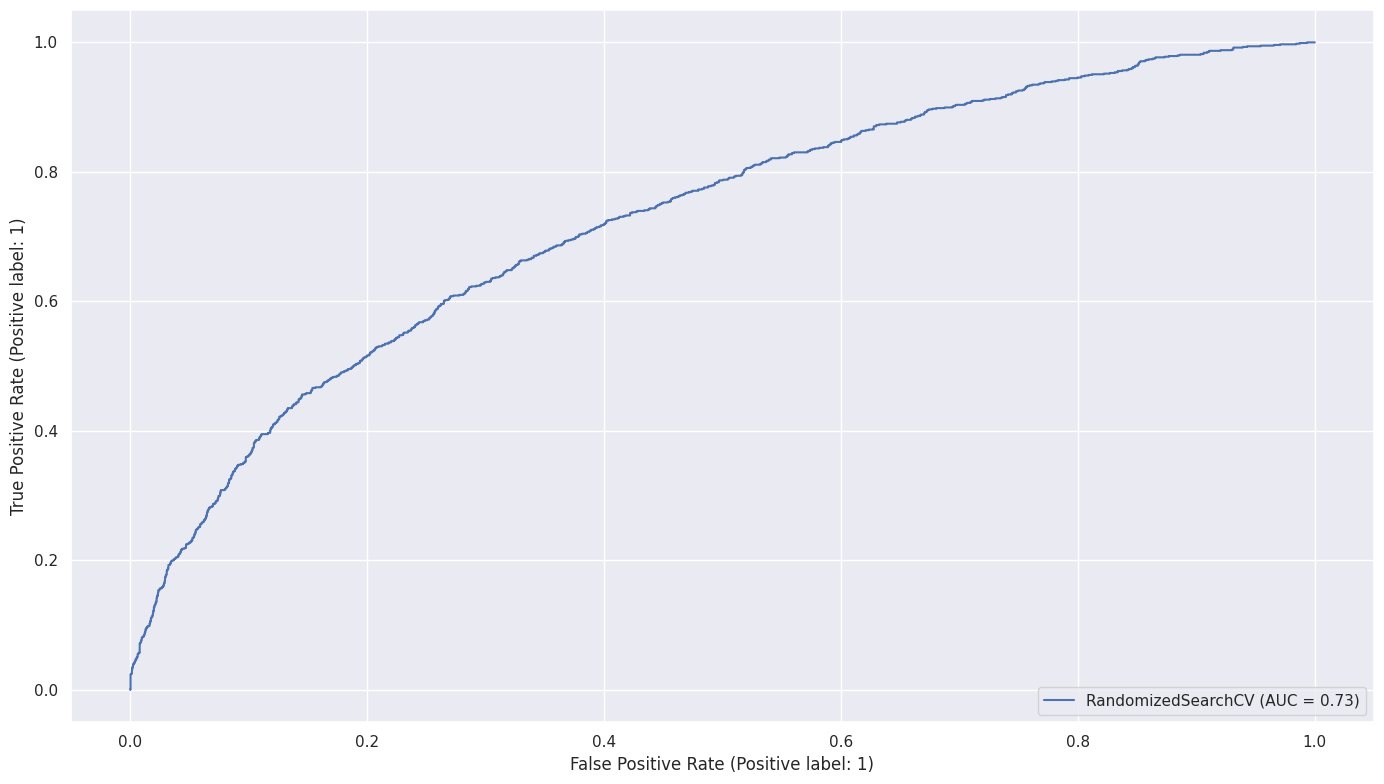

In [62]:
model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, forest_randomized_cv)

--> **Saved Results : **

f1_score :

0.7156

0.4690

accuracy_score :

0.8570

0.7489

precision :

0.6391

0.4404

recall :

0.8130

0.5015

AUC Score :

0.6466

**Summary of RandomForest Classifier**

* f1_score improved from 0.34 to 0.46, which is slightly better than the logistic Regression model (f1_score = 0.33).

* But there is scope of improving training quality also in this model, as train f1_score is low, model is under bias.

##### Next things to try -
*   Introduce Boosting - AdaGrad (Predict residuals in next set of estimators), AdaBoost (next estimators focus more on misclassified samples).
*   More sophisticated tree based model to invcrease variance e.g. **XGBOOST, LightGBM**



### 1.3. Quick SVC attempt

**Warning : Next cell will take around 20 minutes.**

In [ ]:
from sklearn.svm import SVC

params = {'kernel'            : ['rbf', 'linear', 'poly', 'sigmoid'],
          'degree'            : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'gamma'             : ['auto', 'scale', 0, 0.05, 0.1, 0.2, 0.5, 0.1],
          'coef0'             : [0, 0.05, 0.1, 0.2, 0.5, 0.1, 0.2, 0.5, 0.75, 0.9, 1.0],
          'shrinking'         : [False, True],
          'max_iter'          : [-1, 10, 20, 50, 100, 500, 1000, 2000, 5000],
          }

svc = SVC(class_weight = 'balanced', random_state = 2023, verbose = True)
svc_randomized_cv = RandomizedSearchCV(svc, params, scoring = 'f1', n_iter = 20, n_jobs = 4, cv = 5, verbose = 4)

svc_randomized_cv.fit(train_x, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
train_predictions = svc_randomized_cv.predict(train_x)
predictions = svc_randomized_cv.predict(val_x)

In [ ]:
model_outcome_and_metrics(train_y, train_predictions, val_x, val_y, predictions, svc_randomized_cv)

## Summary of Models & Next Steps
*   Best F1-score we have found is 0.54
*   There is opportunity to tune model further.
*   We have not tried XGBoost, LightGBM, atleast 2 layers DNN.
*   RandomizedSearch should be explored in depth.
*   Analysis of FP & FN has to be done to get insights on what are we missing.
*   Stacking of models should also help - get aggrgated outcomes by multiple models.

* **Pre-model**
  *   Feature selection (by PCA or any other method) should be done to get rid of redundant features.
  *   More feature exploration EDA is required.
    *   We ignored PAY_AMT* features, these could bring some value.



